### **Iris Classification**

The goal of our machine learning model is to predict the type of iris species based on four features (`sepallength`, `sepalwidth`, `petallength` and `petalwidth`).

**Dependencies**

These are the libraries that we'll be using in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, r2_score, mean_squared_error, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

**The Dataset**

In [2]:
MY_DF = pd.read_csv(r'https://raw.githubusercontent.com/ST10437317/kpillay-firstrepo-vc/main/ST10437317_IRIS_DATA.csv')
MY_DF

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Data Preprocessing**

Converting the categorical `class` iris labels into numerical representations.

In [3]:
L_ENCODE = LabelEncoder()

LABEL_DICT = {0 : 'Iris-setosa', 1 : 'Iris-versicolor', 2 : 'Iris-virginica'}
MY_DF.replace(MY_DF['class'].values, np.int64(L_ENCODE.fit_transform(MY_DF['class'])), inplace = True)
MY_DF

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**Descriptive Statistics**

More detailed information about the data such as the distribution, percentile, average and range.

In [4]:
MY_DF.describe()

,sepallength,sepalwidth,petallength,petalwidth,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**Feature Information**

Checking for any null values and the data types of the features.

In [5]:
MY_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


**Visualizations**

The correlation heatmap displays the R-values for each of the variables relationships in order to determine the strength of the relationship.

<Axes: >

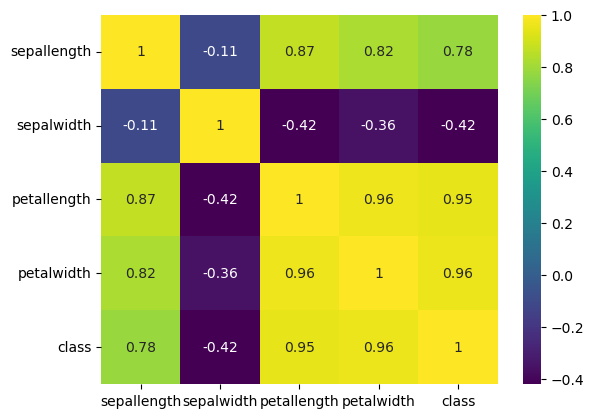

In [6]:
sns.heatmap(MY_DF.corr(), annot = True, cmap = "viridis")

c:\tools\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


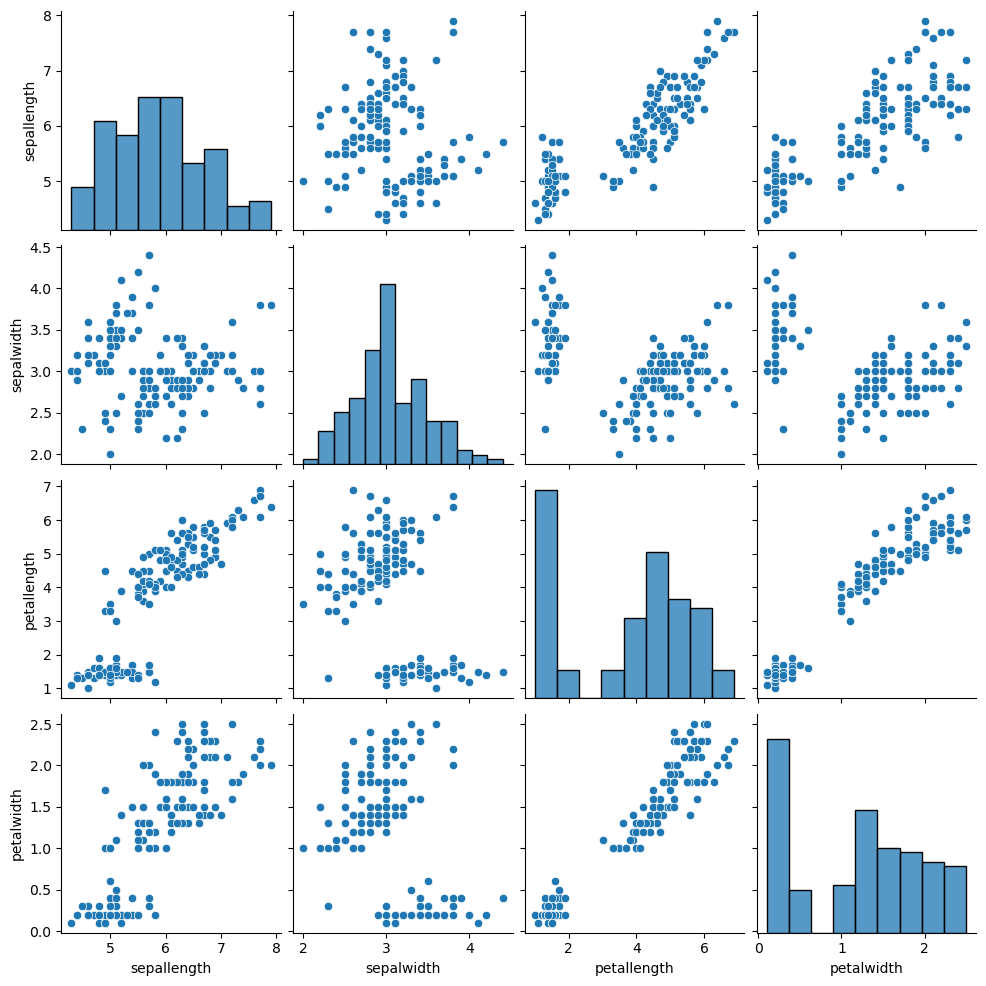

In [7]:
sns.pairplot(data = MY_DF.drop(columns = ['class']))

**Training And Test Splits**

Dropping the `class` column (that is the dependent variable)

In [8]:
X = MY_DF.drop(columns = ["class"])
y = MY_DF["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [9]:
X.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
pd.DataFrame(y.head())

,class
0,0
1,0
2,0
3,0
4,0


**Model Setup And Fitting**

The k-Neighbors classifier estimates the label of a data point based on its proximity to the surrounding data points that may have similar features.

In [11]:
KNN_MODEL = KNeighborsClassifier(n_neighbors = 1)
KNN_MODEL.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

Comparing the true labels to the predicted labels.

In [12]:
KNN_MODEL.fit(X_train, y_train)
y_preds = KNN_MODEL.predict(X_test)
pd.DataFrame({'Y Actual': y_test, 'Y Prediction': y_preds}).head(10)

,Y Actual,Y Prediction
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1


Testing the model on a new sample.

In [13]:
X_NEW = np.array([[5, 2.9, 1, 0.2]])
NEW_PRED = KNN_MODEL.predict(X_NEW);
print(f'Label: {LABEL_DICT[NEW_PRED[0]]}')

Label: Iris-setosa


c:\tools\Anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**Model Assessment**

The following metrics shall state how effective the model is at iris classification.

In [14]:
def MODEL_METRICS(y_true, y_preds):
  print(f"Accuracy:             {accuracy_score(y_true, y_preds)}")
  print(f"R-Squared:            {r2_score(y_true, y_preds)}")
  print(f"Mean Squared Error:   {mean_squared_error(y_true, y_preds)}")
  print(f"Mean Absolute Error:  {mean_absolute_error(y_true, y_preds)}")

So the model fits the data perfectly with no errors.

In [15]:
MODEL_METRICS(y_test, y_preds)

Accuracy:             1.0
R-Squared:            1.0
Mean Squared Error:   0.0
Mean Absolute Error:  0.0


Comparing the True Positives to False Positives and True Negatives to False Negatives.

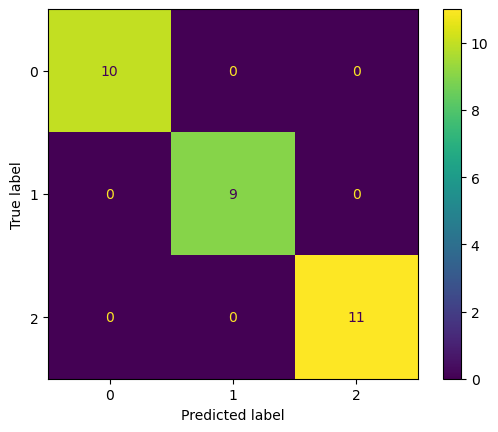

In [16]:
CMD = ConfusionMatrixDisplay(confusion_matrix(y_test, y_preds))
CMD.plot()
plt.show()